In [66]:
import osmnx as ox
import networkx as nx
import contextily as ctx
import matplotlib.pyplot as plt

airport_icao_code = "SBBR" 
osm_filter = '["aeroway"~"runway|jet_bridge|landing_light|construction|shelter|aerodrome|beacon|taxiway|apron|control_tower|control_center|gate|hangar|helipad|heliport|navigationaid|taxilane|terminal|windsock|highway_strip|parking_position|holding_position|airstrip|stopway|tower"]'
# you can find other tags linked to airports here: https://wiki.openstreetmap.org/wiki/Key:aeroway

G = ox.graph_from_place(
    airport_icao_code,
    simplify=False,
    retain_all=True,
    truncate_by_edge=True,
    buffer_dist=1000,
    custom_filter=osm_filter,
)

gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)


/opt/conda/lib/python3.9/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/opt/conda/lib/python3.9/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/opt/conda/lib/python3.9/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


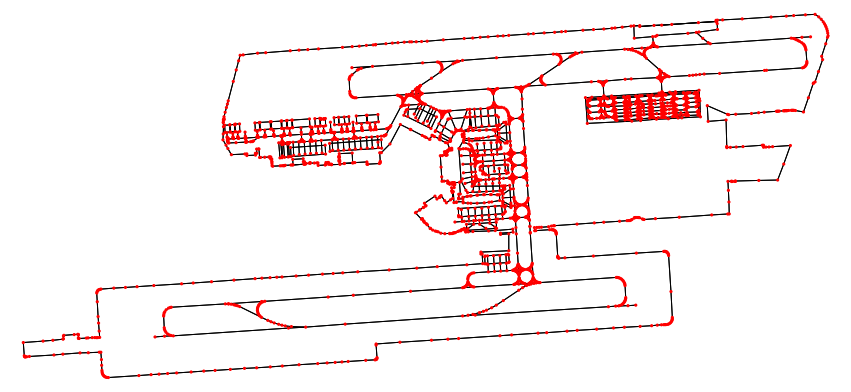

In [67]:
f, ax = ox.plot_graph(
    G,
    figsize=(15, 15),
    bgcolor="white",
    edge_color="black",
    node_color="red",
    edge_linewidth=1,
    node_size=10,
    show=True,
)

/opt/conda/lib/python3.9/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/opt/conda/lib/python3.9/site-packages/osmnx/geometries.py:816: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_inner_linestring in list(merged_inner_linestrings):
/opt/conda/lib/python3.9/site-packages/osmnx/geometries.py:816: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_inner_linestring in list(merged_inner_linestrings):
/opt/conda/lib/python3.9/site-packages/osmnx

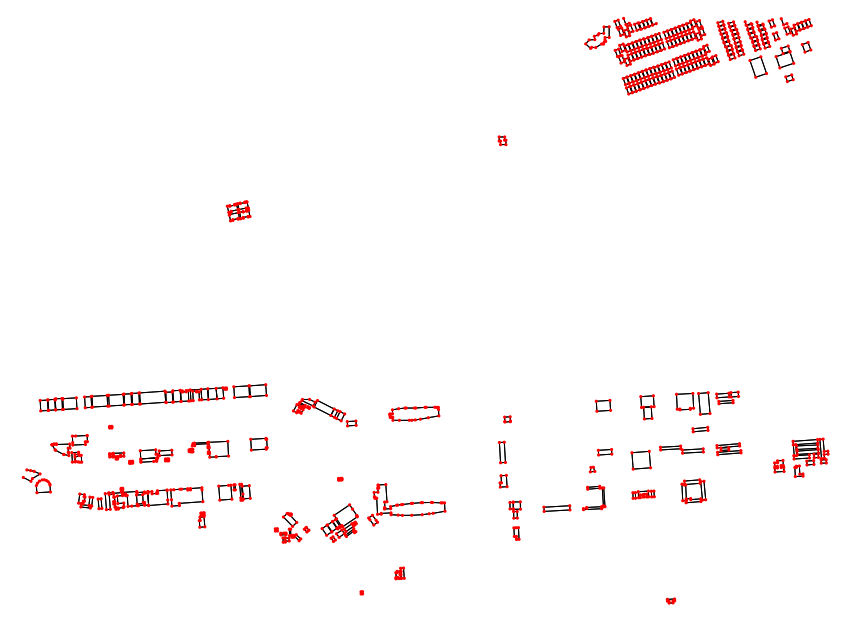

In [90]:
pt = ox.graph_to_gdfs(G, edges=False).unary_union.centroid
bbox = ox.utils_geo.bbox_from_point((pt.y, pt.x), dist=2000)
predios = ox.geometries.geometries_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3], tags={"building": True})


G2 = ox.graph_from_bbox(
    bbox[0], bbox[1], bbox[2], bbox[3],
    simplify=False,
    retain_all=True,
    truncate_by_edge=True,
    custom_filter='["building"]'
)

gdf_nodes1, gdf_edges1 = ox.graph_to_gdfs(G2)

f1, ax1 = ox.plot_graph(
    G2,
    figsize=(15, 15),
    bgcolor="white",
    edge_color="black",
    node_color="red",
    edge_linewidth=1,
    node_size=10,
    show=True,
)

gdf_nodes1 = ox.io._stringify_nonnumeric_cols(gdf_nodes1)
gdf_edges1 = ox.io._stringify_nonnumeric_cols(gdf_edges1)

gdf_nodes1.to_file(airport_icao_code + '-buildings-nodes.geojson', driver='GeoJSON')
gdf_edges1.to_file(airport_icao_code + '-buildings-edges.geojson', driver='GeoJSON')

#predios.to_file(airport_icao_code + '-buildings.geojson', driver='GeoJSON')

In [69]:
gdf_edges.head()
#busca = gdf_edges.query('name=="14L/32R"')

osmid      ref width  oneway   length name  \
u         v          key                                                   
111498800 4642661859 0     12302442  11L/29R    45   False   76.158  NaN   
          5032962719 0    515330716  11L/29R   NaN   False   61.049  NaN   
111498914 4642662823 0     12302442  11L/29R    45   False  146.201  NaN   
111499069 4642662839 0     12302442  11L/29R    45   False   38.109  NaN   
          4642661860 0     12302442  11L/29R    45   False  140.038  NaN   

                                                                   geometry  
u         v          key                                                     
111498800 4642661859 0    LINESTRING (-47.89772 -15.86164, -47.89843 -15...  
          5032962719 0    LINESTRING (-47.89772 -15.86164, -47.89715 -15...  
111498914 4642662823 0    LINESTRING (-47.92753 -15.86358, -47.92617 -15...  
111499069 4642662839 0    LINESTRING (-47.92056 -15.86315, -47.92021 -15...  
          4642661860 0    LINESTRING (-47.92056 -15.86315, -47.92187 -15...

In [ ]:
# ox.geometries.geometries_from_bbox(north, south, east, west, tags)

In [70]:
gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)

In [71]:
gdf_nodes.to_file(airport_icao_code + '-nodes.geojson', driver='GeoJSON')
gdf_edges.to_file(airport_icao_code + '-edges.geojson', driver='GeoJSON')